<a href="https://colab.research.google.com/github/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/blob/main/Code/team_blancpain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DMML TEAM BLANCPAIN



In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

##Data Importation##

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/training_data.csv')

df_test = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/test_data.csv')

df_sample = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/sample_submission.csv')

##Data visualization##

In [4]:
df_train.head(10)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [5]:
print("There are {0} rows and {1} columns in the train dataset.".format(df_train.shape[0],df_train.shape[1]))


There are 6471 rows and 5 columns in the train dataset.


In [6]:
df_test.head(10)

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
5,10020,twister,NaN,Brain twister let drop up telly structuring ca...
6,8676,sinkhole,"San Diego, CA",RT twit_san_diego 'Possible sinkhole disrupts ...
7,3131,debris,NaN,Aircraft debris found on island is from MH370 ...
8,2195,catastrophic,"Dublin, Ireland",'Kessler Syndrome' is the name for the catastr...
9,3484,derailed,DC,So a train derailed and instead of me getting ...


In [7]:
print("There are {0} rows and {1} columns in the test dataset.".format(df_test.shape[0],df_test.shape[1]))


There are 1142 rows and 4 columns in the test dataset.


In [8]:
base_rate = max(len(df_train[df_train["target"] == 0]) / len(df_train), len(df_train[df_train["target"] == 1]) / len(df_train))
print("The base rate for this problem is :", base_rate)

The base rate for this problem is : 0.5719363313243703


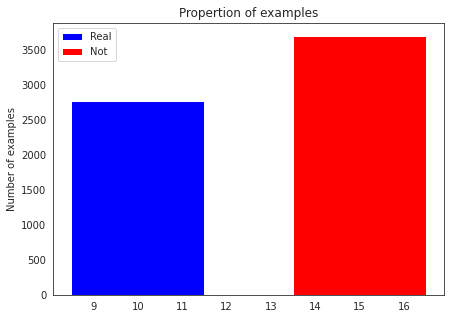

In [9]:
# extracting the number of examples of each class
Real_len = df_train[df_train['target'] == 1].shape[0]
Not_len = df_train[df_train['target'] == 0].shape[0]

# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

##EDA

In [10]:
df_train.fillna("Unknown", inplace = True)

In [11]:
df_train["keyword"].replace(["bush%20fires","forest%20fires","wild%20fires","hellfire","forest%20fire"],"natural_fires", inplace = True)
df_train["keyword"].replace(["suicide%20bomber","suicide%20bombing","suicide%20bomb"],"suicide_bombing", inplace = True)
df_train["keyword"].replace(["building%20fires","buildings%20burning","buildings%20on%20fire","burning%20buildings"],"building_fires", inplace = True)
df_train["keyword"].replace(["blew%20up","blown%20up"],"blew_up", inplace = True)
df_train["keyword"].replace(["structural%20failure"],"structural_failure", inplace = True)
df_train["keyword"].replace(["natural%20disaster"],"natural_disaster", inplace = True)
df_train["keyword"].replace(["body%20bags","body%20bagging","body%20bag"],"body_bags", inplace = True)
df_train["keyword"].replace(["emergency%20services"],"emergency_services", inplace = True)
df_train["keyword"].replace(["dust%20storm"],"dust_storm", inplace = True)
df_train["keyword"].replace(["heat%20wave"],"heat_wave", inplace = True)
df_train["keyword"].replace(["mass%20murder","mass%20murderer"],"mass_murder", inplace = True)
df_train["keyword"].replace(["war%20zone"],"war_zone", inplace = True)
df_train["keyword"].replace(["emergency%20plan"],"emergency_plan", inplace = True)
df_train["keyword"].replace(["nuclear%20reactor","nuclear%20disaster"],"nuclear", inplace = True)
df_train["keyword"].replace(["airplane%20accident"],"airplane_accident", inplace = True)
df_train["keyword"].replace(["chemical%20emergency"],"chemical_emergency", inplace = True)
df_train["keyword"].replace(["radiation%20emergency"],"radiation_emergency", inplace = True)
df_train["keyword"].replace(["oil%20spill"],"oil_spill", inplace = True)
df_train["keyword"].replace(["loud%20bang"],"loud_bang", inplace = True)
df_train["keyword"].replace(["cliff%20fall"],"cliff_fall", inplace = True)
df_train["keyword"].replace(["bridge%20collapse"],"bridge_collapse", inplace = True)
df_train["keyword"].replace(["fire%20truck"],"fire_truck", inplace = True)
df_train["keyword"].replace(["violent%20storm"],"violent_storm", inplace = True)
df_train["keyword"].replace(["first%20responders"],"first_responders", inplace = True)
df_train["keyword"].replace(["annihilated","annihilation"],"annihilation", inplace = True)
df_train["keyword"].replace(["arson","arsonist"],"arson", inplace = True)
df_train["keyword"].replace(["attacked","attack"],"attack", inplace = True)
df_train["keyword"].replace(["bioterrorist","bioterror","bioterrorism"],"bioterrorist", inplace = True)
df_train["keyword"].replace(["blaze","blazing"],"blaze", inplace = True)
df_train["keyword"].replace(["blood","bloody"],"blood", inplace = True)
df_train["keyword"].replace(["bomb","bombing","bombed"],"bomb", inplace = True)
df_train["keyword"].replace(["burned","burning"],"burning", inplace = True)
df_train["keyword"].replace(["casualty","casualties"],"casualty", inplace = True)
df_train["keyword"].replace(["catastroph","catastrophic","catastrophe"],"catastroph", inplace = True)
df_train["keyword"].replace(["collapse","collapsed"],"collapse", inplace = True)
df_train["keyword"].replace(["collision","collide"],"collision", inplace = True)
df_train["keyword"].replace(["crash","crashed"],"crashed", inplace = True)
df_train["keyword"].replace(["crush","crushed"],"crush", inplace = True)
df_train["keyword"].replace(["death","dead","deaths"],"dead", inplace = True)
df_train["keyword"].replace(["deluge","deluged"],"deluge", inplace = True)
df_train["keyword"].replace(["demolition","demolish","demolished"],"demolition", inplace = True)
df_train["keyword"].replace(["derail","derailment","derailed"],"derail", inplace = True)
df_train["keyword"].replace(["deluge","deluged"],"deluge", inplace = True)
df_train["keyword"].replace(["destruction","destroy","destroyed"],"destruction", inplace = True)
df_train["keyword"].replace(["desolation","desolate"],"desolation", inplace = True)
df_train["keyword"].replace(["detonation","detonate"],"detonation", inplace = True)
df_train["keyword"].replace(["devastation","devastated"],"devastation", inplace = True)
df_train["keyword"].replace(["drown","drowned","drowning"],"drown", inplace = True)
df_train["keyword"].replace(["electrocute","electrocuted"],"electrocute", inplace = True)
df_train["keyword"].replace(["emergency","emergency_plan","emergency_services"],"emergency", inplace = True)
df_train["keyword"].replace(["evacuation","evacuated","evacuate"],"evacuation", inplace = True)
df_train["keyword"].replace(["explosion","exploded","explode"],"explosion", inplace = True)
df_train["keyword"].replace(["fatal","fatalities", "fatality"],"fatal", inplace = True)
df_train["keyword"].replace(["flood","flooding","floods"],"flood", inplace = True)
df_train["keyword"].replace(["hail","hailstorm"],"hail", inplace = True)
df_train["keyword"].replace(["hazard","hazardous"],"hazard", inplace = True)
df_train["keyword"].replace(["hijack","hijacker","hijacking"],"hijack", inplace = True)
df_train["keyword"].replace(["hostage","hostages"],"hostage", inplace = True)
df_train["keyword"].replace(["injury","injuries","injured"],"injury", inplace = True)
df_train["keyword"].replace(["inundation","inundated"],"inundation", inplace = True)
df_train["keyword"].replace(["obliteration","obliterated", "obliterate"],"obliteration", inplace = True)
df_train["keyword"].replace(["panic","panicking"],"panic", inplace = True)
df_train["keyword"].replace(["quarantine","quarantined"],"quarantine", inplace = True)
df_train["keyword"].replace(["rescue","rescued","rescuers"],"rescue", inplace = True)
df_train["keyword"].replace(["riot","rioting"],"riot", inplace = True)
df_train["keyword"].replace(["screams","screaming","screamed"],"scream", inplace = True)
df_train["keyword"].replace(["siren","sirens"],"siren", inplace = True)
df_train["keyword"].replace(["survivors","survive","survived"],"survivor", inplace = True)
df_train["keyword"].replace(["terrorism","terrorist"],"terrorist", inplace = True)
df_train["keyword"].replace(["trauma","traumatised"],"trauma", inplace = True)
df_train["keyword"].replace(["weapon","weapons"],"weapon", inplace = True)
df_train["keyword"].replace(["wounded","wounds"],"wounds", inplace = True)
df_train["keyword"].replace(["wreck","wreckage","wrecked"],"wreckage", inplace = True)

In [12]:
df_deluge = pd.DataFrame(df_train["keyword"].value_counts())

In [13]:
df_deluge.shape

(143, 1)

In [14]:
newlist=[]
len = df_train.shape[0]
i=0
while i<len:
  category = df_train['keyword'].iloc[i]
  if category not in newlist:
    newlist.append(category)
  i+=1
print(sorted(newlist))


['Unknown', 'ablaze', 'accident', 'aftershock', 'airplane_accident', 'ambulance', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'attack', 'avalanche', 'battle', 'bioterrorist', 'blaze', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood', 'body_bags', 'bomb', 'bridge_collapse', 'building_fires', 'burning', 'casualty', 'catastroph', 'chemical_emergency', 'cliff_fall', 'collapse', 'collided', 'collision', 'crashed', 'crush', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'debris', 'deluge', 'demolition', 'derail', 'desolation', 'destruction', 'detonation', 'devastation', 'disaster', 'displaced', 'drought', 'drown', 'dust_storm', 'earthquake', 'electrocute', 'emergency', 'engulfed', 'epicentre', 'evacuation', 'explosion', 'eyewitness', 'famine', 'fatal', 'fear', 'fire', 'fire_truck', 'first_responders', 'flames', 'flattened', 'flood', 'hail', 'harm', 'hazard', 'heat_wave', 'hijack', 'hostage', 'hurricane', 'injury', 'inundation', 'landslide', 'lava', 'lightning', 'loud_b

In [15]:
liste_nature = ['avalanche' , 'blizzard',   'catastroph', 'cliff_fall',  'cyclone',"deluge",'drought', 'dust_storm', 'earthquake', 'engulfed', 'epicentre',  'flood', 'hail', 'heat_wave', 'hurricane',  'inundation', 'landslide', 'lava', 'lightning',  'mudslide', 'natural_disaster', 'natural_fires', "outbreak", 'pandemonium',   'rainstorm',   'sandstorm', 'seismic', 'sinkhole',   'snowstorm',  'storm',  'thunder', 'thunderstorm', 'tornado',    'tsunami', 'twister', 'typhoon',  'violent_storm', 'volcano', 'whirlwind', 'wildfire', 'windstorm']

In [16]:
liste_not_nature = []
for i in newlist : 
  if i not in liste_nature :
    liste_not_nature.append(i)
print(sorted(liste_not_nature))

['Unknown', 'ablaze', 'accident', 'aftershock', 'airplane_accident', 'ambulance', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'attack', 'battle', 'bioterrorist', 'blaze', 'bleeding', 'blew_up', 'blight', 'blood', 'body_bags', 'bomb', 'bridge_collapse', 'building_fires', 'burning', 'casualty', 'chemical_emergency', 'collapse', 'collided', 'collision', 'crashed', 'crush', 'curfew', 'damage', 'danger', 'dead', 'debris', 'demolition', 'derail', 'desolation', 'destruction', 'detonation', 'devastation', 'disaster', 'displaced', 'drown', 'electrocute', 'emergency', 'evacuation', 'explosion', 'eyewitness', 'famine', 'fatal', 'fear', 'fire', 'fire_truck', 'first_responders', 'flames', 'flattened', 'harm', 'hazard', 'hijack', 'hostage', 'injury', 'loud_bang', 'mass_murder', 'massacre', 'mayhem', 'meltdown', 'military', 'nuclear', 'obliteration', 'oil_spill', 'panic', 'police', 'quarantine', 'radiation_emergency', 'razed', 'refugees', 'rescue', 'riot', 'rubble', 'ruin', 'scream',

In [17]:
new_list_not_nature = [  'accident',  'airplane_accident',   'apocalypse', 'armageddon', 'army', 'arson', 'attack', 'battle', 'bioterrorist', 'bomb', 'bridge_collapse', 'building_fires',  'chemical_emergency',  'collided', 'collision', 'crashed',  'curfew',  'demolition', 'derail', 'detonation',    'electrocute', 'explosion',   'fire_truck',   'hijack', 'hostage',   'mass_murder', 'massacre', 'mayhem',  'military', 'nuclear',  'oil_spill',  'radiation_emergency',  'riot',  'structural_failure', 'suicide_bombing',  'terrorist',  'war_zone', 'weapon']

In [18]:
#len = df_train.shape[0]
#i = 0 
#while i < len: 
#  if str(df_train["keyword"].iloc[i]) in liste_nature : 
#    df_train["target"].iloc[i] = 1
#  elif str(df_train["keyword"].iloc[i]) in new_list_not_nature : 
#    df_train["target"].iloc[i] = 0
#  i +=1
#df_train

In [19]:
df_deluge.sample(50)

,keyword
riot,55
battle,21
sinking,36
crashed,57
twister,35
upheaval,32
cliff_fall,28
armageddon,34
heat_wave,32
loud_bang,29


In [20]:
df_train_pourcentage =df_train[df_train['keyword'].str.contains("%20")]

In [21]:
df_train_pourcentage["keyword"].value_counts()

Series([], Name: keyword, dtype: int64)

In [22]:
df_test["keyword"].replace(["bush%20fires","forest%20fires","wild%20fires","hellfire","forest%20fire"],"natural_fires", inplace = True)
df_test["keyword"].replace(["suicide%20bomber","suicide%20bombing","suicide%20bomb"],"suicide_bombing", inplace = True)
df_test["keyword"].replace(["building%20fires","buildings%20burning","buildings%20on%20fire","burning%20buildings"],"building_fires", inplace = True)
df_test["keyword"].replace(["blew%20up","blown%20up"],"blew_up", inplace = True)
df_test["keyword"].replace(["structural%20failure"],"structural_failure", inplace = True)
df_test["keyword"].replace(["natural%20disaster"],"natural_disaster", inplace = True)
df_test["keyword"].replace(["body%20bags","body%20bagging","body%20bag"],"body_bags", inplace = True)
df_test["keyword"].replace(["emergency%20services"],"emergency_services", inplace = True)
df_test["keyword"].replace(["dust%20storm"],"dust_storm", inplace = True)
df_test["keyword"].replace(["heat%20wave"],"heat_wave", inplace = True)
df_test["keyword"].replace(["mass%20murder","mass%20murderer"],"mass_murder", inplace = True)
df_test["keyword"].replace(["war%20zone"],"war_zone", inplace = True)
df_test["keyword"].replace(["emergency%20plan"],"emergency_plan", inplace = True)
df_test["keyword"].replace(["nuclear%20reactor","nuclear%20disaster"],"nuclear", inplace = True)
df_test["keyword"].replace(["airplane%20accident"],"airplane_accident", inplace = True)
df_test["keyword"].replace(["chemical%20emergency"],"chemical_emergency", inplace = True)
df_test["keyword"].replace(["radiation%20emergency"],"radiation_emergency", inplace = True)
df_test["keyword"].replace(["oil%20spill"],"oil_spill", inplace = True)
df_test["keyword"].replace(["loud%20bang"],"loud_bang", inplace = True)
df_test["keyword"].replace(["cliff%20fall"],"cliff_fall", inplace = True)
df_test["keyword"].replace(["bridge%20collapse"],"bridge_collapse", inplace = True)
df_test["keyword"].replace(["fire%20truck"],"fire_truck", inplace = True)
df_test["keyword"].replace(["violent%20storm"],"violent_storm", inplace = True)
df_test["keyword"].replace(["first%20responders"],"first_responders", inplace = True)
df_test["keyword"].replace(["annihilated","annihilation"],"annihilation", inplace = True)
df_test["keyword"].replace(["arson","arsonist"],"arson", inplace = True)
df_test["keyword"].replace(["attacked","attack"],"attack", inplace = True)
df_test["keyword"].replace(["bioterrorist","bioterror","bioterrorism"],"bioterrorist", inplace = True)
df_test["keyword"].replace(["blaze","blazing"],"blaze", inplace = True)
df_test["keyword"].replace(["blood","bloody"],"blood", inplace = True)
df_test["keyword"].replace(["bomb","bombing","bombed"],"bomb", inplace = True)
df_test["keyword"].replace(["burned","burning"],"burning", inplace = True)
df_test["keyword"].replace(["casualty","casualties"],"casualty", inplace = True)
df_test["keyword"].replace(["catastroph","catastrophic","catastrophe"],"catastroph", inplace = True)
df_test["keyword"].replace(["collapse","collapsed"],"collapse", inplace = True)
df_test["keyword"].replace(["collision","collide"],"collision", inplace = True)
df_test["keyword"].replace(["crash","crashed"],"crashed", inplace = True)
df_test["keyword"].replace(["crush","crushed"],"crush", inplace = True)
df_test["keyword"].replace(["death","dead","deaths"],"dead", inplace = True)
df_test["keyword"].replace(["deluge","deluged"],"deluge", inplace = True)
df_test["keyword"].replace(["demolition","demolish","demolished"],"demolition", inplace = True)
df_test["keyword"].replace(["derail","derailment","derailed"],"derail", inplace = True)
df_test["keyword"].replace(["deluge","deluged"],"deluge", inplace = True)
df_test["keyword"].replace(["destruction","destroy","destroyed"],"destruction", inplace = True)
df_test["keyword"].replace(["desolation","desolate"],"desolation", inplace = True)
df_test["keyword"].replace(["detonation","detonate"],"detonation", inplace = True)
df_test["keyword"].replace(["devastation","devastated"],"devastation", inplace = True)
df_test["keyword"].replace(["drown","drowned","drowning"],"drown", inplace = True)
df_test["keyword"].replace(["electrocute","electrocuted"],"electrocute", inplace = True)
df_test["keyword"].replace(["emergency","emergency_plan","emergency_services"],"emergency", inplace = True)
df_test["keyword"].replace(["evacuation","evacuated","evacuate"],"evacuation", inplace = True)
df_test["keyword"].replace(["explosion","exploded","explode"],"explosion", inplace = True)
df_test["keyword"].replace(["fatal","fatalities", "fatality"],"fatal", inplace = True)
df_test["keyword"].replace(["floods","flood","flooding"],"flood", inplace = True)
df_test["keyword"].replace(["hail","hailstorm"],"hail", inplace = True)
df_test["keyword"].replace(["hazard","hazardous"],"hazard", inplace = True)
df_test["keyword"].replace(["hijack","hijacker","hijacking"],"hijack", inplace = True)
df_test["keyword"].replace(["hostage","hostages"],"hostage", inplace = True)
df_test["keyword"].replace(["injury","injuries","injured"],"injury", inplace = True)
df_test["keyword"].replace(["inundation","inundated"],"inundation", inplace = True)
df_test["keyword"].replace(["obliteration","obliterated", "obliterate"],"obliteration", inplace = True)
df_test["keyword"].replace(["panic","panicking"],"panic", inplace = True)
df_test["keyword"].replace(["quarantine","quarantined"],"quarantine", inplace = True)
df_test["keyword"].replace(["rescue","rescued","rescuers"],"rescue", inplace = True)
df_test["keyword"].replace(["riot","rioting"],"riot", inplace = True)
df_test["keyword"].replace(["screams","screaming","screamed"],"scream", inplace = True)
df_test["keyword"].replace(["siren","sirens"],"siren", inplace = True)
df_test["keyword"].replace(["survivors","survive","survived"],"survivor", inplace = True)
df_test["keyword"].replace(["terrosrism","terrorist"],"terrorist", inplace = True)
df_test["keyword"].replace(["trauma","traumatised"],"trauma", inplace = True)
df_test["keyword"].replace(["weapon","weapons"],"weapon", inplace = True)
df_test["keyword"].replace(["wounded","wounds"],"wounds", inplace = True)
df_test["keyword"].replace(["wreck","wreckage","wrecked"],"wreckage", inplace = True)

In [23]:
df_test_pourcentage =df_train[df_train['keyword'].str.contains("%20")]

In [24]:
df_test_pourcentage["keyword"].value_counts()

Series([], Name: keyword, dtype: int64)

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import spacy
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [26]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
punctuationmarks = string.punctuation

In [27]:
sp = spacy.load('en_core_web_sm')

def tokenize_function(tweet):
    tokens = sp(tweet)
    tokens = [ i.lemma_.lower().strip() if i.lemma_ != "-PRON-" else i.lower_ for i in tokens ]
    tokens = [ i for i in tokens if i not in stopwords and i not in punctuationmarks ]
    return tokens

In [28]:
df_train["keyword_text"] = df_train['keyword'] + ' ' + df_train['text'] 
df_train["keyword_text"] = df_train["keyword_text"].astype(str)
df_test["keyword_text"] = df_test['keyword'] + ' ' + df_test['text'] 
df_test["keyword_text"] = df_test["keyword_text"].astype(str)

In [29]:
X_train = df_train["keyword_text"]
y_train = df_train['target']
X_test = df_test["keyword_text"]

In [30]:
tfidf_feature_vector = TfidfVectorizer(tokenizer=tokenize_function)

In [31]:
classifierCV = LogisticRegressionCV(solver='lbfgs', cv=10, max_iter=10000, random_state=72)

In [32]:
pipe = Pipeline([('vectorizer', tfidf_feature_vector),
                 ('classifier', classifierCV)])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function tokenize_function at 0x7f3231c0d158>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=10,
                                      dual=

In [34]:
sentiment_pred = pipe.predict(X_test)

In [35]:
train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print("The training accuracy is", train_accuracy_score)

The training accuracy is 0.9292226858290836


In [36]:
soumission = pd.DataFrame(sentiment_pred, columns=["target"])

In [37]:
soumission

,target
0,0
1,0
2,1
3,0
4,0
...,...
1137,1
1138,1
1139,1
1140,0


In [38]:
from google.colab import drive
drive.mount("drive", force_remount=True)


Mounted at drive


In [39]:
soumissioncsv =soumission.to_csv("soumission3_1.csv")

In [40]:
!cp soumission3_1.csv "drive/My Drive/Projet_DM"